# Open Exploration (Disaggregated Outcomes)

... [add NB description] ...

## 1. Model and dependency import

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Model
from problem_formulation import get_model_for_problem_formulation

In [5]:
prob_formulation = 1

model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

In [4]:
len(uncertainties), len(levers)

(18, 21)

In [50]:
results = load_results('results/GSA_PF6_S500_P100_.tar.gz')

experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S500_P100_.tar.gz


In [51]:
outcomes

{'A.1_Total Costs': array([4.7847948e+07, 4.7847948e+07, 4.7847948e+07, ..., 1.5483484e+08,
        1.5483484e+08, 1.5483484e+08]),
 'A.1_Dike Investment Costs': array([4.7847948e+07, 4.7847948e+07, 4.7847948e+07, ..., 1.5483484e+08,
        1.5483484e+08, 1.5483484e+08]),
 'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Total Costs': array([9.98859095e+07, 1.03891802e+08, 9.98859095e+07, ...,
        1.33844205e+08, 1.33844205e+08, 1.33844205e+08]),
 'A.2_Dike Investment Costs': array([9.98859095e+07, 9.98859095e+07, 9.98859095e+07, ...,
        1.33844205e+08, 1.33844205e+08, 1.33844205e+08]),
 'A.2_Expected Annual Damage': array([      0.        , 4005892.42734186,       0.        , ...,
              0.        ,       0.        ,       0.        ]),
 'A.2_Expected Number of Deaths': array([0.        , 0.00473563, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'A.3_Tota

In [52]:
var_interest = 'A.5_Expected Number of Deaths'
threshold = np.percentile(outcomes[var_interest], 95)

y = outcomes[var_interest] >= threshold

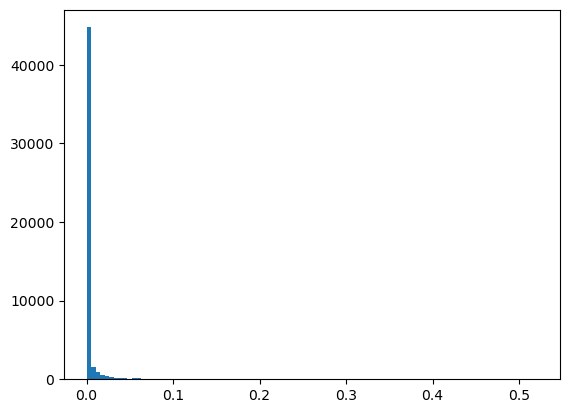

0.0 0.5214655995365916
[0.         0.         0.         0.         0.         0.00623134
 0.5214656 ]


In [53]:
import matplotlib.pyplot as plt
plt.hist(outcomes[var_interest], bins=100)
plt.show()
print(np.min(outcomes[var_interest]), np.max(outcomes[var_interest]))
print(np.percentile(outcomes[var_interest], [0, 5, 10, 20, 50, 90, 100]))

In [54]:
print(np.sum(y))
print(np.unique(y, return_counts=True))

2501
(array([False,  True]), array([47499,  2501]))


In [55]:
x = experiments.drop(columns=list(model.levers.keys()))

In [56]:
x

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,scenario,policy,model
0,17,163.492528,1.0,0.112280,295.928502,1.0,0.664716,112.850429,10.0,0.249037,...,1.0,0.364480,106.591540,1.5,0.524725,1.5,4.5,100,0,dikesnet
1,109,161.331147,1.5,0.557056,287.927055,1.5,0.305245,67.755957,1.0,0.493271,...,1.0,0.585453,251.611701,1.0,0.430767,2.5,1.5,101,0,dikesnet
2,21,283.754940,1.0,0.585620,111.088305,1.0,0.404485,70.092344,1.0,0.227254,...,1.0,0.970132,76.712001,1.5,0.340304,3.5,3.5,102,0,dikesnet
3,22,234.402140,10.0,0.052935,324.883833,1.5,0.849773,94.132989,1.5,0.764959,...,1.5,0.259079,108.351400,1.5,0.947650,1.5,4.5,103,0,dikesnet
4,63,311.595648,10.0,0.541642,231.788804,1.5,0.345724,81.935305,10.0,0.939125,...,10.0,0.821012,138.553913,1.5,0.062765,2.5,4.5,104,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11,33.092413,1.0,0.139144,90.596702,10.0,0.312237,306.380340,1.5,0.564625,...,1.5,0.230004,122.214241,10.0,0.328436,3.5,2.5,595,99,dikesnet
49996,16,111.720887,10.0,0.686123,222.355408,1.5,0.176305,65.900668,10.0,0.520273,...,10.0,0.841140,227.164685,1.5,0.212565,3.5,3.5,596,99,dikesnet
49997,108,327.123910,10.0,0.913894,192.274266,1.0,0.223449,147.180795,10.0,0.781790,...,1.5,0.382323,219.835706,1.0,0.445010,1.5,3.5,597,99,dikesnet
49998,56,113.527561,1.5,0.306634,244.538331,1.0,0.115638,153.401123,1.5,0.021029,...,1.0,0.012801,210.173623,10.0,0.276789,3.5,2.5,598,99,dikesnet


In [57]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,policy,model
0,17,163.492528,1.0,0.112280,295.928502,1.0,0.664716,112.850429,10.0,0.249037,...,2,10,9,1,8,5,0,100,0,dikesnet
1,109,161.331147,1.5,0.557056,287.927055,1.5,0.305245,67.755957,1.0,0.493271,...,2,10,9,1,8,5,0,101,0,dikesnet
2,21,283.754940,1.0,0.585620,111.088305,1.0,0.404485,70.092344,1.0,0.227254,...,2,10,9,1,8,5,0,102,0,dikesnet
3,22,234.402140,10.0,0.052935,324.883833,1.5,0.849773,94.132989,1.5,0.764959,...,2,10,9,1,8,5,0,103,0,dikesnet
4,63,311.595648,10.0,0.541642,231.788804,1.5,0.345724,81.935305,10.0,0.939125,...,2,10,9,1,8,5,0,104,0,dikesnet


In [58]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       '0_RfR 0', '0_RfR 1', '1_RfR 0', '1_RfR 1', '2_RfR 0', '2_RfR 1',
       '3_RfR 0', '3_RfR 1', '4_RfR 0', '4_RfR 1', 'A.1_DikeIncrease 0',
       'A.1_DikeIncrease 1', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.4_DikeIncrease 0',
       'A.4_DikeIncrease 1', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [59]:
x.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'scenario', 'policy', 'model'],
      dtype='object')

In [60]:
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x=x, y=y, threshold=0.6, peel_alpha=0.1, mode=RuleInductionType.BINARY)
box_casualties = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 50000 points remaining, containing 2501 cases of interest
[MainProcess/INFO] mean: 0.6256916996047431, mass: 0.0506, coverage: 0.6329468212714914, density: 0.6256916996047431 restricted_dimensions: 2


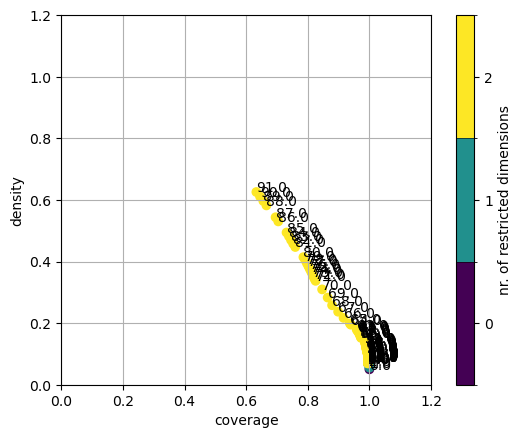

In [64]:
box_casualties.show_tradeoff(annotated=True)
plt.grid(True)
plt.show()

In [62]:
box_casualties.inspect(91)

coverage       0.632947
density        0.625692
id            91.000000
k           1583.000000
mass           0.050600
mean           0.625692
n           2530.000000
res_dim        2.000000
Name: 91, dtype: float64

                                                      box 91  \
                                                         min   
A.5_pfail                                           0.000594   
policy     {6, 13, 17, 21, 22, 26, 32, 46, 47, 48, 62, 66...   

                                                                                
                                                         max qp value qp value  
A.5_pfail                                           0.219971      NaN      0.0  
policy     {6, 13, 17, 21, 22, 26, 32, 46, 47, 48, 62, 66...      0.0      NaN  



/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{6, 13, 17, 21, 22, 26, 32, 46, 47, 48, 62, 66, 67, 69, 74, 75, 79, 87, 88, 90, 91, 96, 97}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{6, 13, 17, 21, 22, 26, 32, 46, 47, 48, 62, 66, 67, 69, 74, 75, 79, 87, 88, 90, 91, 96, 97}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

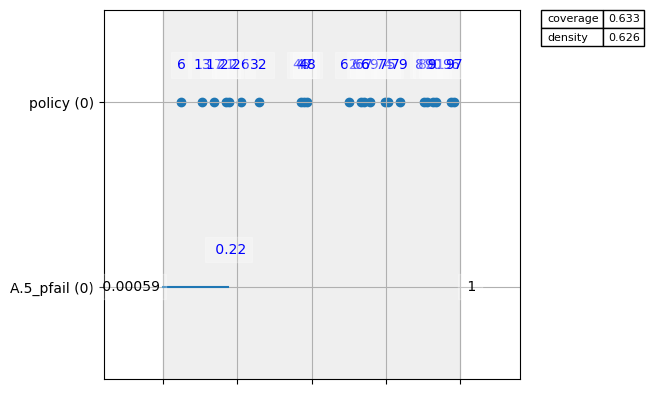

In [63]:
box_casualties.inspect(91, style='graph')
plt.grid(True)
plt.show()

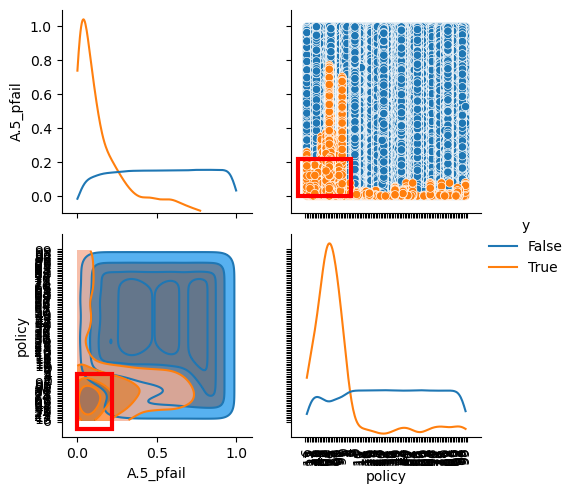

In [65]:
box_casualties.select(91)
fig = box_casualties.show_pairs_scatter()
plt.show()

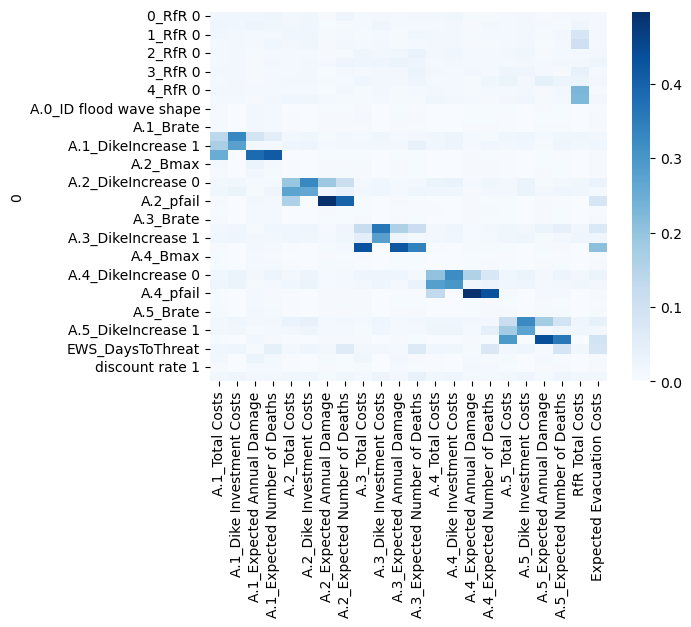

In [66]:
scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)
ax = sns.heatmap(scores, annot=False, cmap = "Blues", fmt=".2f")

In [6]:
ema_logging.log_to_stderr(ema_logging.INFO)

prob_formulation = 1
n_scenario = 20
n_policy = 10

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.SOBOL
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
/opt/anaconda3/envs/school/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 20 scenarios * 440 policies * 1 model(s) = 8800 experiments
100%|██████████████████████████████████████| 8800/8800 [07:08<00:00, 20.54it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF1_S20_P10_.tar.gz


In [8]:
experiments_sobol, outcomes_sobol = results

In [14]:
Si = sobol.analyze(problem, outcomes_sobol[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.493835  0.255479
0_RfR 1             0.504046  0.734394
1_RfR 0             1.013973  0.058404
1_RfR 1             0.194533  0.187033
2_RfR 0             0.333816  0.422281
2_RfR 1             0.492636  0.692189
3_RfR 0             0.798014  1.218864
3_RfR 1             0.151937  0.153140
4_RfR 0             0.322628  0.307505
4_RfR 1             0.474487  0.723977
A.1_DikeIncrease 0  0.949891  1.093464
A.1_DikeIncrease 1  0.184055  0.202550
A.2_DikeIncrease 0  0.379633  0.357087
A.2_DikeIncrease 1  0.370414  0.537972
A.3_DikeIncrease 0  0.822280  1.026829
A.3_DikeIncrease 1  0.162097  0.182372
A.4_DikeIncrease 0  0.310132  0.263305
A.4_DikeIncrease 1  0.344124  0.532434
A.5_DikeIncrease 0  0.608408  0.724683
A.5_DikeIncrease 1  0.018286  0.024424
EWS_DaysToThreat    0.484713  0.246986
                          S1   S1_conf
0_RfR 0             0.881835  0.204356
0_RfR 1             0.264760  0.325086
1_RfR 0             1.782

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


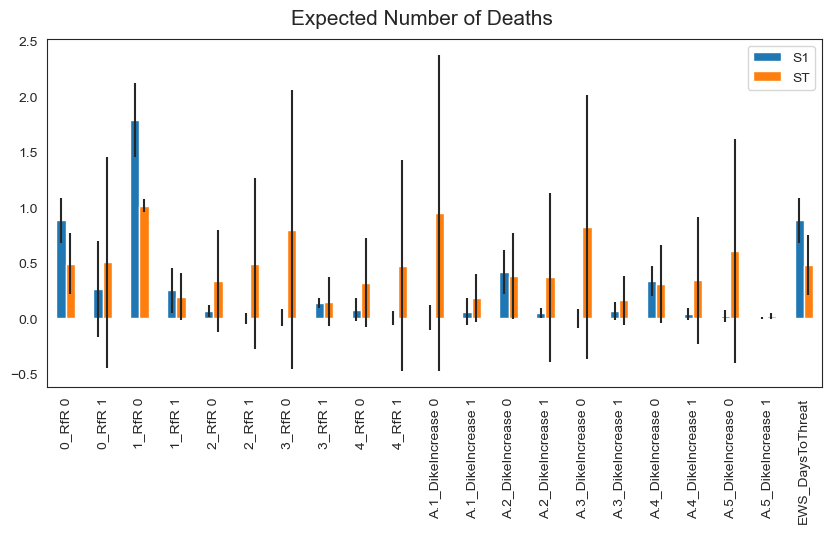

In [10]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_sobol[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

In [11]:
import itertools

def flatten_dict_arrays(dictionary):
    flattened_dict = {}

    for key, value in dictionary.items():
        flattened_array = []
        for row in value:
            flattened_array.extend(row)
        flattened_dict[key] = flattened_array

    return flattened_dict

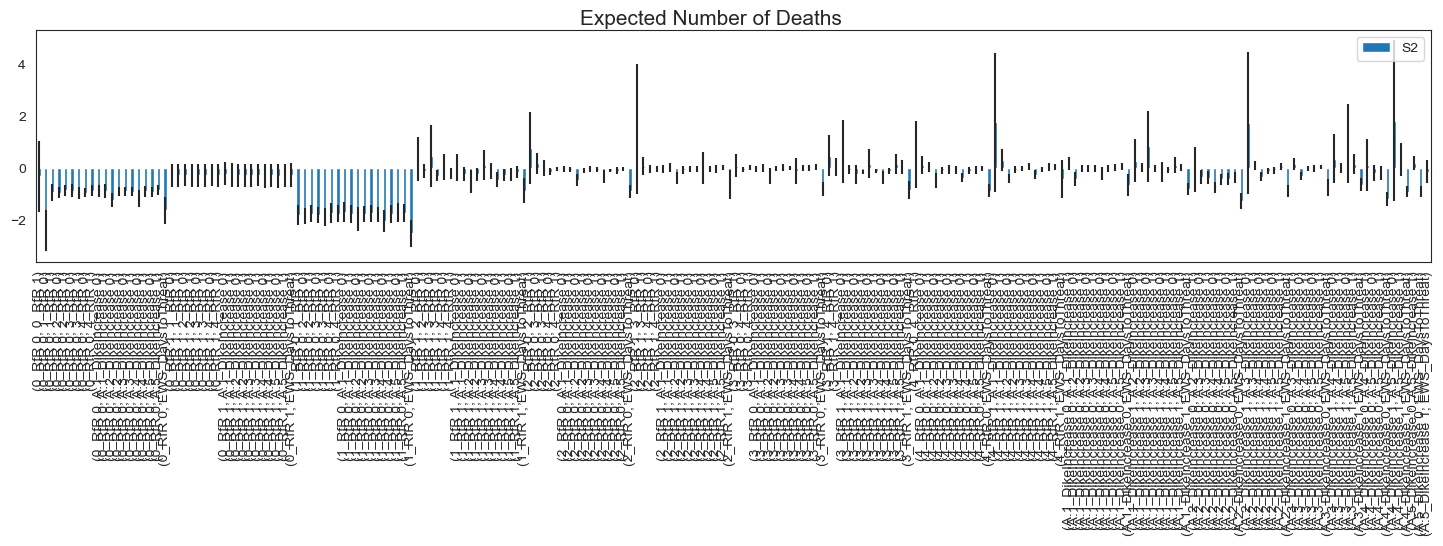

In [12]:
Si_filter_s2 = {k:Si[k] for k in ['S2','S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index= list(itertools.product(problem['names'], repeat=2)))

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df[["S2"]].dropna(), S2_df[['S2_conf']].dropna()

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18,4)
fig.subplots_adjust(bottom=0.3)
plt.show()